In [2]:
import numpy as np

# 1) 데이터 읽기

In [3]:
import pandas as pd

df = pd.read_csv('./DSA_features.csv')

df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


# 2) EDA 실행

In [4]:
df.shape

(9120, 272)

## 2-1) 결측치 확인, 제거

In [5]:
# 결측치 확인
df.isnull().sum()

T_xacc_mean     0
T_xacc_max      0
T_xacc_min      0
T_xacc_var      0
T_xacc_std      0
               ..
LL_zmag_var     0
LL_zmag_std     0
LL_zmag_skew    0
activity        0
people          0
Length: 272, dtype: int64

In [6]:
df.isnull().values.any()

False

## 2-2) 레이블 확인

Text(0, 0.5, 'Count')

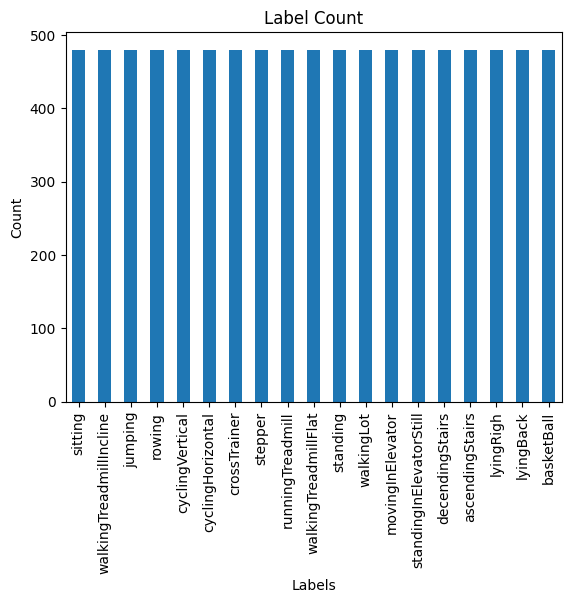

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 레이블별 갯수 확인
label_counts = df['activity'].value_counts()

# 바 그래프 그리기
label_counts.plot(kind='bar')

# 그래프 제목 및 라벨 설정
plt.title('Label Count')
plt.xlabel('Labels')
plt.ylabel('Count')

In [8]:
# 레이블 갯수 확인 (숫자)
df['activity'].value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

In [9]:
# DSA데이터에서 LyingBack, LyingRigh(normal) / Standing(abnormal)만 남김

filtered_df = df[df['activity'].isin(['lyingBack', 'lyingRigh', 'standing'])]

filtered_df.shape

(1440, 272)

activity를 레이블 인코딩해줌

In [10]:
# filtered_df에서 activity 값을 수정
for index, row in filtered_df.iterrows():
    if row['activity'] == 'lyingBack' or row['activity'] == 'lyingRigh':
        filtered_df.at[index, 'activity'] = 0  # Normal
    else:
        filtered_df.at[index, 'activity'] = 1  # Abnormal

In [11]:
LABELS = ["Normal", "Abnormal"]

C:\Users\황주신\AppData\Local\Temp\ipykernel_17160\2237617807.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(filtered_df['activity'], sort = True)


Text(0, 0.5, 'Frequency')

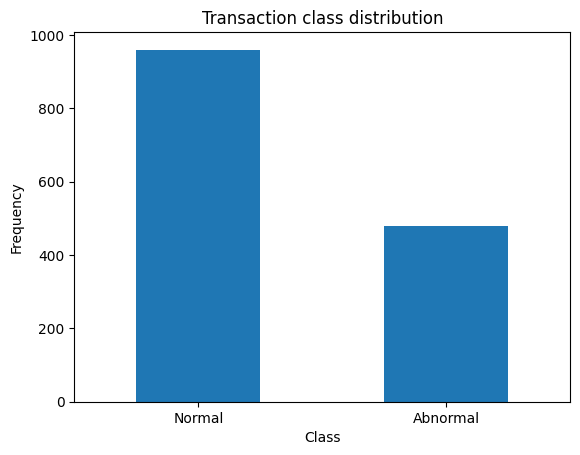

In [12]:
count_classes = pd.value_counts(filtered_df['activity'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [13]:
# filtered_df를 기준으로 abnormal과 normal 데이터프레임 생성
abnormal = filtered_df[filtered_df['activity'] == 1]
normal = filtered_df[filtered_df['activity'] == 0]

# abnormal 데이터프레임의 shape 확인
print(abnormal.shape)


(480, 272)


In [14]:
normal.shape

(960, 272)

## 2-3) 데이터 및 레이블 인코딩

people를 삭제

In [15]:
# 'people' 컬럼을 삭제
abnormal = abnormal.drop('people', axis = 1)
normal = normal.drop('people', axis = 1)

# 3) Train데이터, Test데이터 나누기

In [16]:
RANDOM_SEED = 32

# split train, test
from sklearn.model_selection import train_test_split

normal_train, normal_test = train_test_split(normal, test_size = 0.2, random_state = RANDOM_SEED)

각각 나눠진 normal_test에 abnormal을 병합한다. 이는 Test data로 사용된다.

In [17]:
Test_data = pd.concat([normal_train, abnormal], ignore_index=True)

shuffled_index = np.random.permutation(Test_data.index)
Test_data = Test_data.iloc[shuffled_index].reset_index(drop=True)

Test_data

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
0,9.138845,9.19780,9.05580,0.000619,0.024882,-0.434144,-0.050352,0.017267,-0.123300,0.000948,...,6.925966e-06,0.002632,-0.850709,0.244985,0.24769,0.24123,1.337885e-06,0.001157,-0.351376,1
1,-3.024209,-2.84960,-3.19280,0.006082,0.077989,-0.035341,1.745945,1.833300,1.647300,0.001472,...,7.158213e-07,0.000846,-0.076909,-0.320236,-0.31677,-0.32230,1.118523e-06,0.001058,0.427898,0
2,8.992255,9.04620,8.91520,0.000963,0.031031,-0.532560,0.320404,0.406750,0.227440,0.001737,...,2.090533e-05,0.004572,-0.814436,-0.565433,-0.54962,-0.58737,2.357712e-05,0.004856,-1.055041,1
3,-4.725558,-4.63280,-4.81170,0.000920,0.030329,0.224022,-0.852101,-0.778800,-0.956380,0.001224,...,5.763788e-07,0.000759,0.068279,-0.632200,-0.63034,-0.63380,4.289506e-07,0.000655,0.292520,0
4,8.490249,8.57630,8.40510,0.001068,0.032678,-0.217700,0.385472,0.479790,0.279780,0.001348,...,4.127945e-06,0.002032,-0.679023,0.639262,0.64185,0.63712,1.183292e-06,0.001088,0.415250,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,-0.577776,-0.51848,-0.63076,0.000313,0.017693,-0.041566,-9.751520,-9.629200,-9.820900,0.000837,...,5.114332e-07,0.000715,-0.174960,-0.614737,-0.61306,-0.61664,5.347797e-07,0.000731,-0.138787,0
1244,2.577028,2.62440,2.54300,0.000316,0.017781,0.322958,-9.381730,-9.339400,-9.429700,0.000213,...,7.980212e-05,0.008933,0.359453,-0.412865,-0.38355,-0.43887,7.043043e-05,0.008392,-0.031117,0
1245,8.910143,9.00320,8.75650,0.002132,0.046168,-0.092138,0.046111,0.128900,-0.064505,0.001025,...,5.755761e-06,0.002399,-0.286795,0.253634,0.25587,0.25115,1.162199e-06,0.001078,-0.384983,1
1246,1.546755,1.58960,1.48490,0.000467,0.021615,0.004960,-6.318770,-6.258800,-6.398900,0.000890,...,1.278137e-06,0.001131,0.219369,-0.459162,-0.45765,-0.46046,3.357485e-07,0.000579,0.114855,0


Test_data의 X와 Y값을 나눠준다.

In [18]:
Test_X = Test_data.drop(['activity'], axis = 1)
Test_Y = Test_data['activity']

학습시에는 activity값이 필요가 없기 때문에 activity 열을 drop한다.

In [19]:
normal_train.shape

(768, 271)

In [20]:
normal_train = normal_train.drop(['activity'], axis = 1)

# 4) Train, Valid 데이터 나누기

In [21]:
Train_data, Valid_data = train_test_split(normal_train, test_size = 0.2, random_state= RANDOM_SEED)

In [22]:
Train_data = np.array(Train_data)
Test_data = np.array(Test_data)

# 5) 데이터 스케일링

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Train_data_scaled = scaler.fit_transform(Train_data)
Valid_data_scaled = scaler.fit_transform(Valid_data)
Test_X_scaled = scaler.fit_transform(Test_X)

# 5) Model 정의하기

In [53]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# 오토인코더 모델

input_dim = Train_data_scaled.shape[1]
encoding_dim = 14  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim/2), activation = 'relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# 7) 학습, 예측

In [54]:
history = autoencoder.fit(Train_data_scaled, Train_data_scaled, epochs = 50, batch_size = 32, shuffle = True, validation_data= (Valid_data_scaled,Valid_data_scaled))

autoencoder.summary()

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.2940 - val_loss: 1.2410
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1488 - val_loss: 1.2143
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9985 - val_loss: 1.1518
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9914 - val_loss: 1.0629
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1805 - val_loss: 0.9872
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9037 - val_loss: 0.9398
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1076 - val_loss: 0.9160
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7740 - val_loss: 0.9035
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1060 - val_loss: 0.8950
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7496 - val_loss: 0.8886
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0393 - val_loss: 0.8824
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0132 - val_l

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 270)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 14)             │         3,794 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 270)            │         2,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,179 (71.02 KB)

 Trainable params: 6,059 (23.67 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,120 (47.35 KB)

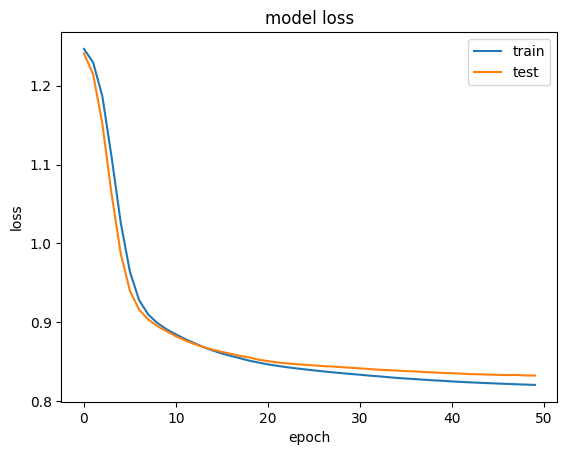

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [56]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(Test_X)
mse = np.mean(np.power(Test_X - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': Test_Y})

error_df = error_df.reset_index(drop = True)
error_df

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,reconstruction_error,true_class
0,5.299732,1
1,4.779695,0
2,5.365179,1
3,4.833410,0
4,5.307953,1
...,...,...
1243,5.102661,0
1244,5.115014,0
1245,5.254656,1
1246,4.930811,0


In [57]:
error_df.describe()

,reconstruction_error
count,1248.000000
mean,5.209375
std,1.325700
min,4.659450
25%,4.935796
50%,5.266847
75%,5.338235
max,46.806268


In [58]:
error_df_normal = error_df[error_df['true_class'] == 0].reset_index(drop=True)

error_df_normal.describe()


,reconstruction_error
count,768.000000
mean,5.123683
std,1.683695
min,4.659450
25%,4.827071
50%,4.997574
75%,5.166248
max,46.806268


In [59]:
error_df_abnormal = error_df[error_df['true_class'] == 1].reset_index(drop=True)

error_df_abnormal.describe()


,reconstruction_error
count,480.000000
mean,5.346483
std,0.073695
min,5.189645
25%,5.298077
50%,5.331327
75%,5.376177
max,5.845429


abnormal의 최소값이 normal의 최댓값보다 큰 것을 알 수 있다.

그래프로 확인해보자.

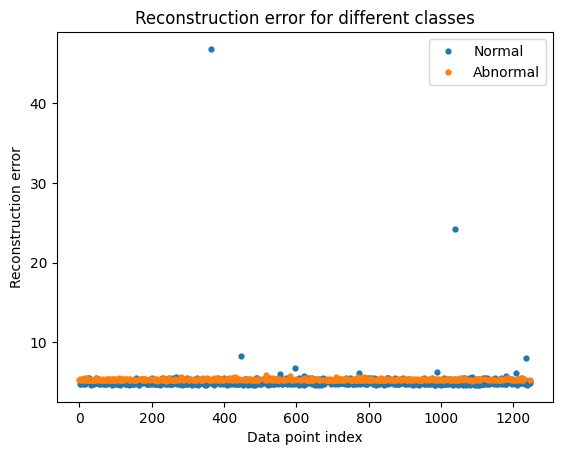

In [60]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Normal" if name == 0 else "Abnormal")
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

abnormal의 최솟값은 5.1 이상이고, normal의 75%값이 5.14정도이니, threshold 값을 5.14로 설정한다.

In [63]:
# threshold 값을 조정하여 최선의 정확도를 얻음

threshold = 5.2

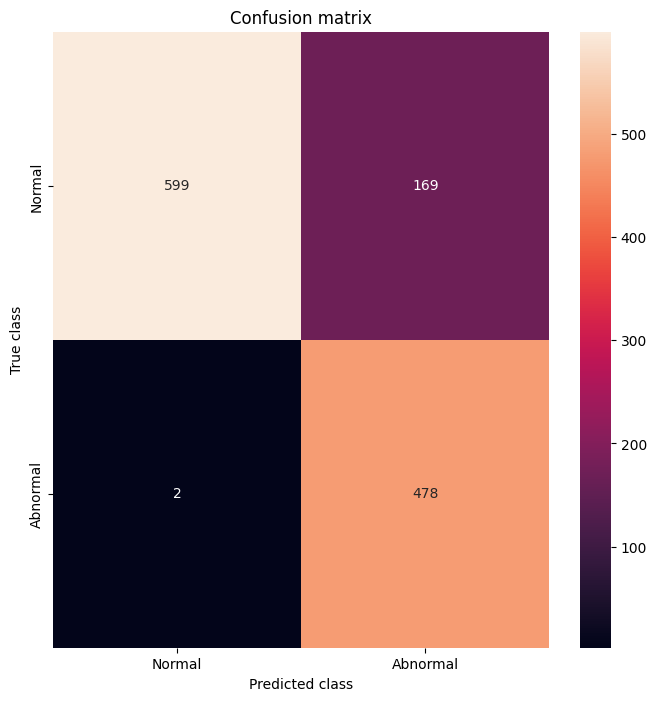

              precision    recall  f1-score   support

           0       1.00      0.78      0.88       768
           1       0.74      1.00      0.85       480

    accuracy                           0.86      1248
   macro avg       0.87      0.89      0.86      1248
weighted avg       0.90      0.86      0.86      1248



In [64]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
y_pred = pd.Series(y_pred)

error_df['true_class'] = error_df['true_class'].astype(int)

conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))

0.86의 Accuracy를 얻어낼 수 있었다.